# Bank Customer Churn Prediction

In [1]:
import warnings
warnings.simplefilter('ignore')

### Importing required libraries -

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

%matplotlib inline

In [3]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [4]:
pd.options.display.float_format = '{:.2f}'.format

### Loading the dataset -

In [5]:
data = pd.read_csv('churn_modelling.csv')

### Performing EDA -

In [6]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [8]:
data.shape

(10000, 14)

In [9]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [10]:
data.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [12]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.00,5000.50,2886.90,1.00,2500.75,5000.50,7500.25,10000.00
CustomerId,10000.00,15690940.57,71936.19,15565701.00,15628528.25,15690738.00,15753233.75,15815690.00
CreditScore,10000.00,650.53,96.65,350.00,584.00,652.00,718.00,850.00
Age,10000.00,38.92,10.49,18.00,32.00,37.00,44.00,92.00
Tenure,10000.00,5.01,2.89,0.00,3.00,5.00,7.00,10.00
Balance,10000.00,76485.89,62397.41,0.00,0.00,97198.54,127644.24,250898.09
NumOfProducts,10000.00,1.53,0.58,1.00,1.00,1.00,2.00,4.00
HasCrCard,10000.00,0.71,0.46,0.00,0.00,1.00,1.00,1.00
IsActiveMember,10000.00,0.52,0.50,0.00,0.00,1.00,1.00,1.00
EstimatedSalary,10000.00,100090.24,57510.49,11.58,51002.11,100193.91,149388.25,199992.48


### Data Cleaning -

Checking for any missing values -

In [13]:
data.isna().sum().any()

False

Checking for any duplicate rows -

In [14]:
duplicate_rows = data[data.duplicated()]
duplicate_rows.shape[0]

0

Dropping all the columns which are not required for the analysis -

In [15]:
data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

Columns with numerical data -

In [16]:
numerical_data = data.select_dtypes(include='number')
numerical_data.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

Columns with categorical data -

In [17]:
categorical_data = data.select_dtypes(exclude='number')
categorical_data.columns

Index(['Geography', 'Gender'], dtype='object')

Checking the outcome labels -

In [18]:
data['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

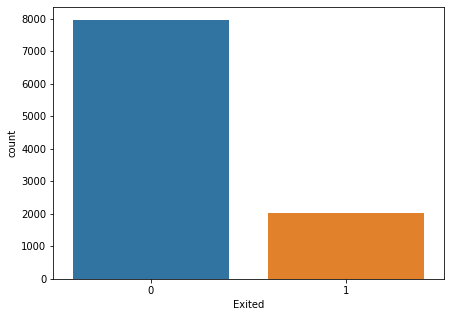

In [19]:
plt.figure(figsize=(7, 5))
sns.countplot(data=data, x='Exited')
plt.show()

### Data Visualization (based on categorical features) -

Customer distribution based on gender -

In [20]:
data['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

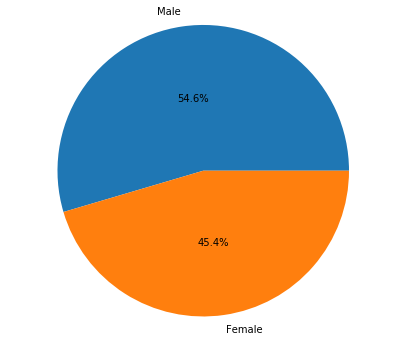

In [21]:
x = data['Gender'].value_counts().values
plt.figure(figsize=(7, 6))
plt.pie(x, center=(0, 0), radius=1.5, labels=['Male', 'Female'], autopct='%1.1f%%', pctdistance=0.5)
plt.axis('equal')
plt.show()

Customer churn based on gender -

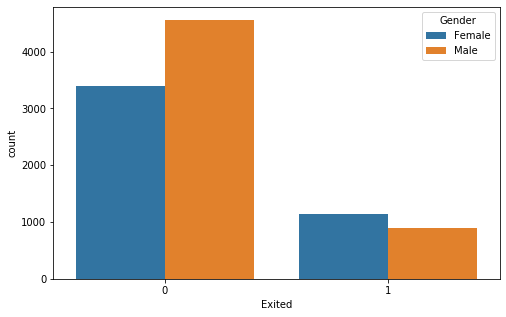

In [22]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Exited', hue='Gender', data=data)
plt.show()

Customer distribution based on geography -

In [23]:
print(data['Geography'].value_counts())

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64


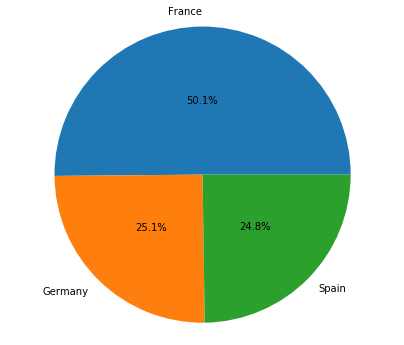

In [24]:
x = data['Geography'].value_counts().values
plt.figure(figsize=(7, 6))
plt.pie(x, center=(0, 0), radius=1.5, labels=['France', 'Germany', 'Spain'], autopct='%1.1f%%', pctdistance=0.5)
plt.axis('equal')
plt.show()

Customer churn based on geography -

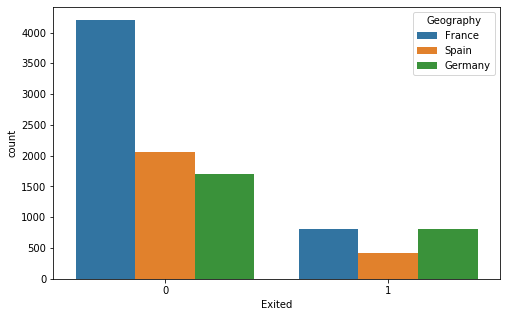

In [25]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Exited', hue='Geography', data=data)
plt.show()

Checking the gender distribution of exited customersbased on their location -

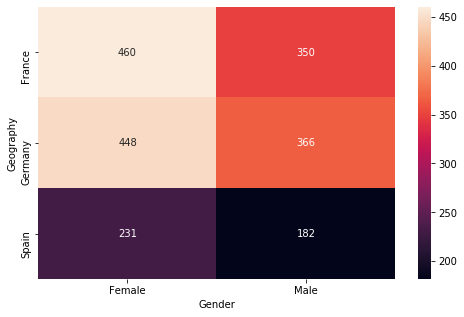

In [26]:
plt.figure(figsize=(8, 5))
crosstab = pd.crosstab(data['Geography'], data['Gender'], values=data['Exited'], aggfunc=np.sum)
sns.heatmap(crosstab, annot=True, fmt='d')
plt.show()

Checking the number of active members -

In [27]:
data['IsActiveMember'].value_counts()

1    5151
0    4849
Name: IsActiveMember, dtype: int64

Customer churn based on the factor whether a customer is activite member or not -

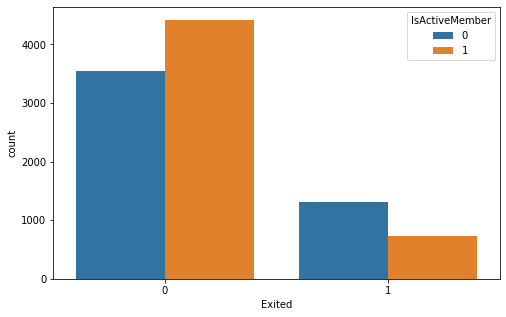

In [28]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Exited', hue='IsActiveMember', data=data)
plt.show()

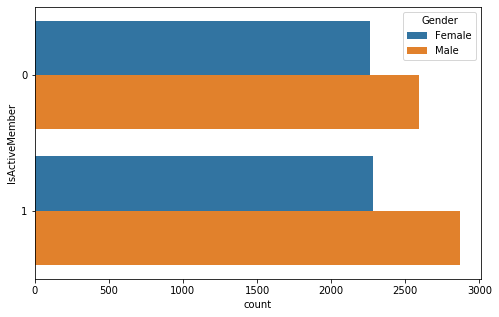

In [29]:
plt.figure(figsize=(8, 5))
sns.countplot(y='IsActiveMember', hue='Gender', data=data)
plt.show()

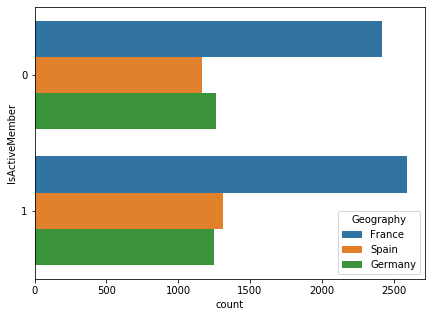

In [30]:
plt.figure(figsize=(7, 5))
sns.countplot(data=data, y='IsActiveMember', hue='Geography')
plt.show()

Checking the numbers of customers having a credit card -

In [31]:
data['HasCrCard'].value_counts()

1    7055
0    2945
Name: HasCrCard, dtype: int64

Customer churn based on the factor whether a customer has a credit card or not -

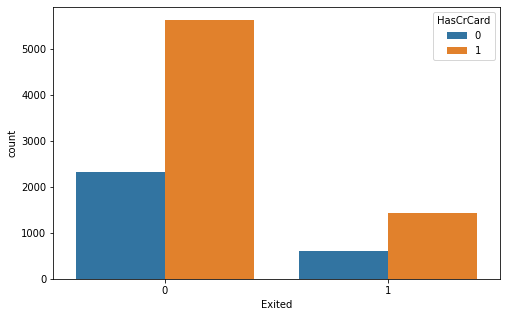

In [32]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Exited', hue='HasCrCard', data=data)
plt.show()

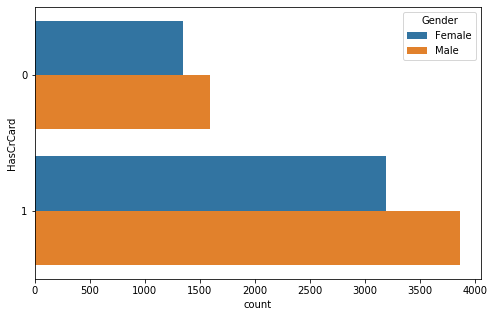

In [33]:
plt.figure(figsize=(8, 5))
sns.countplot(y='HasCrCard', hue='Gender', data=data)
plt.show()

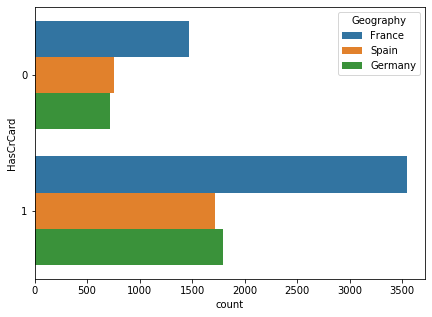

In [34]:
plt.figure(figsize=(7, 5))
sns.countplot(data=data, y='HasCrCard', hue='Geography')
plt.show()

Checking the number of products a customer has subscribed for -

In [35]:
data['NumOfProducts'].value_counts()

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

Customer churn based on the number of products a customer has a subscribed for -

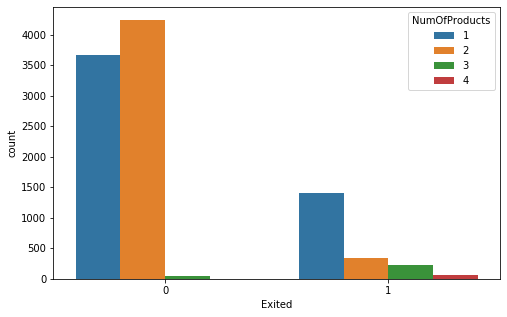

In [36]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Exited', hue='NumOfProducts', data=data)
plt.show()

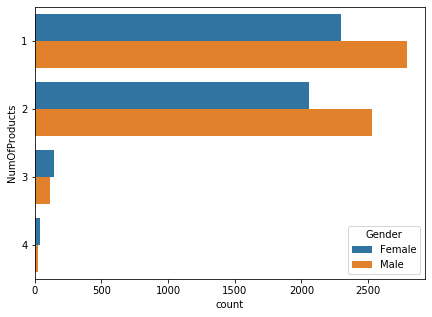

In [37]:
plt.figure(figsize=(7, 5))
sns.countplot(data=data, y='NumOfProducts', hue='Gender')
plt.show()

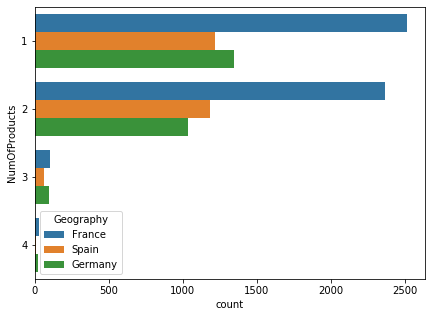

In [38]:
plt.figure(figsize=(7, 5))
sns.countplot(data=data, y='NumOfProducts', hue='Geography')
plt.show()

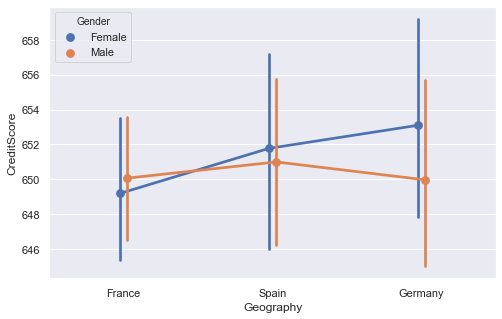

In [39]:
plt.figure(figsize=(8, 5))
sns.set(style="darkgrid")
ax = sns.pointplot(x='Geography', y='CreditScore', hue='Gender', data=data, dodge=True)
plt.show()

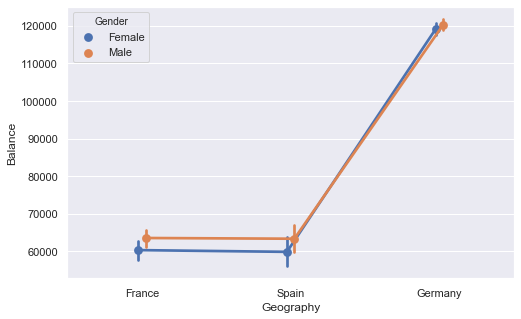

In [40]:
plt.figure(figsize=(8, 5))
sns.set(style="darkgrid")
ax = sns.pointplot(x='Geography', y='Balance', hue='Gender', data=data, dodge=True)
plt.show()

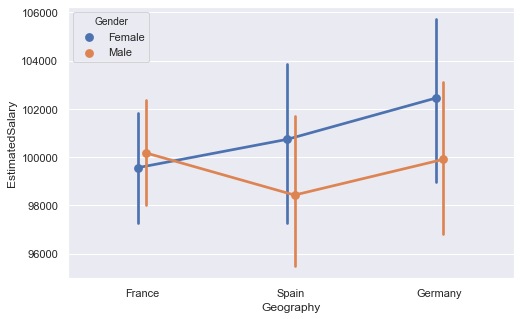

In [41]:
plt.figure(figsize=(8, 5))
sns.set(style="darkgrid")
ax = sns.pointplot(x='Geography', y='EstimatedSalary', hue='Gender', data=data, dodge=True)
plt.show()

Checking the distribution of data -

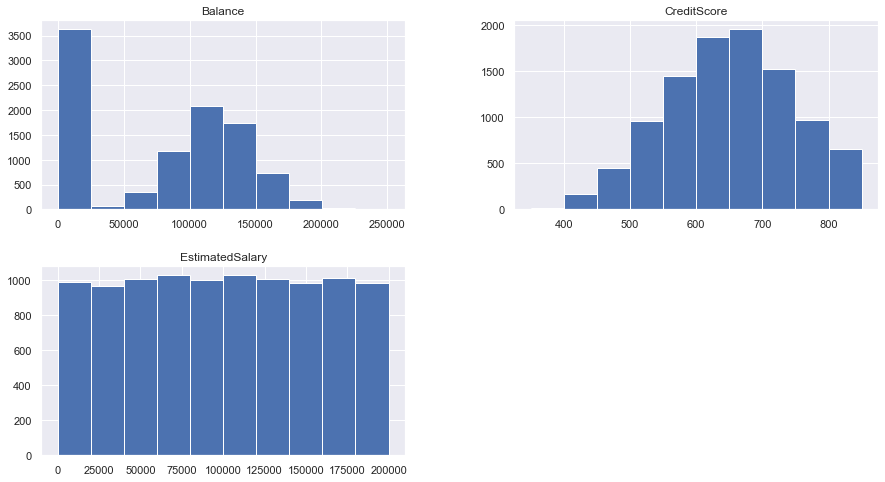

In [42]:
feat_set1 = ['CreditScore', 'Balance', 'EstimatedSalary']
data[feat_set1].hist(figsize=(15, 8))
plt.show()

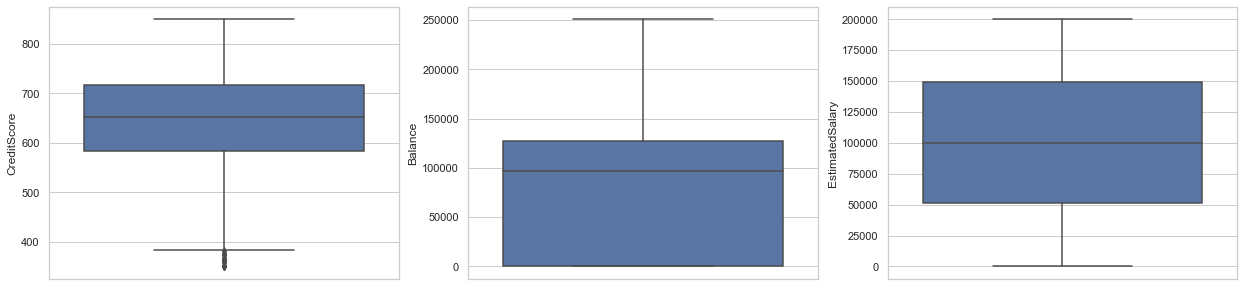

In [43]:
sns.set(style="whitegrid")
fig = plt.figure(figsize=(12, 5))
fig.subplots_adjust(right=1.5)

plt.subplot(1, 3, 1)
sns.boxplot(y=data['CreditScore'])

plt.subplot(1, 3, 2)
sns.boxplot(y=data['Balance'])

plt.subplot(1, 3, 3)
sns.boxplot(y=data['EstimatedSalary'])

plt.show()

In [44]:
def diagnostic_plot(data, col):
    fig = plt.figure(figsize=(9, 4))
    fig.subplots_adjust(right=1.5)
    
    plt.subplot(1, 2, 1)
    sns.distplot(data[col], kde=True, color='red')
    plt.title('Histogram')
    
    plt.subplot(1, 2, 2)
    stats.probplot(data[col], dist='norm', fit=True, plot=plt)
    plt.title('Q-Q Plot')
    
    plt.show()

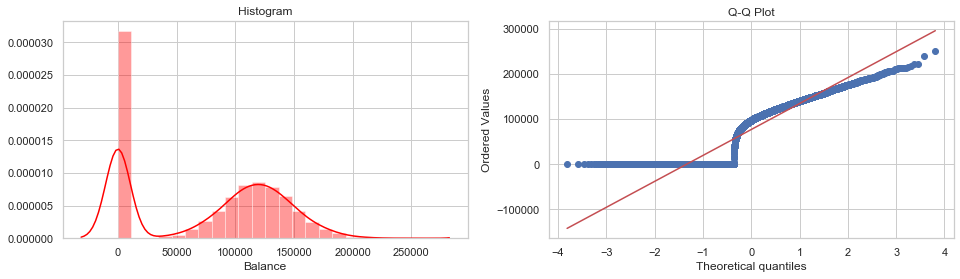

In [45]:
diagnostic_plot(data, 'Balance')

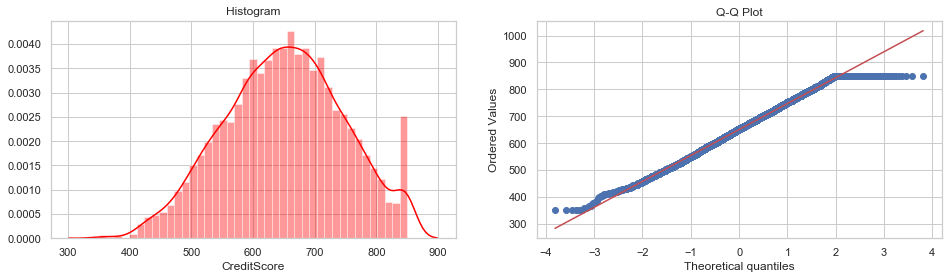

In [46]:
diagnostic_plot(data, 'CreditScore')

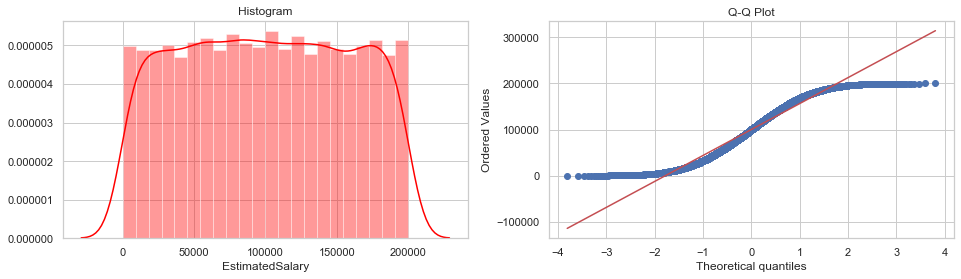

In [47]:
diagnostic_plot(data, 'EstimatedSalary')

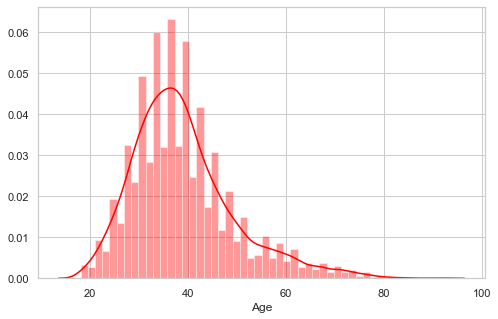

In [48]:
plt.figure(figsize=(8, 5))
sns.distplot(data['Age'], kde=True, color='red')
plt.show()

In [49]:
print("Minimum Age is {}".format(data['Age'].min()))
print("Maximum Age is {}".format(data['Age'].max()))

Minimum Age is 18
Maximum Age is 92


In [50]:
print("Mean: {:.2f}".format(data['Age'].mean()))
print("Median: {:.2f}".format(data['Age'].median()))

Mean: 38.92
Median: 37.00


Checking the correlation between independent variables -

In [51]:
X = data.drop('Exited', axis=1)
X.corr(method='spearman')

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
CreditScore,1.00,-0.01,0.00,0.01,0.01,-0.00,0.02,0.00
Age,-0.01,1.00,-0.01,0.03,-0.06,-0.02,0.04,-0.00
Tenure,0.00,-0.01,1.00,-0.01,0.01,0.02,-0.03,0.01
Balance,0.01,0.03,-0.01,1.00,-0.32,-0.01,-0.01,0.01
NumOfProducts,0.01,-0.06,0.01,-0.32,1.00,0.00,0.02,0.01
HasCrCard,-0.00,-0.02,0.02,-0.01,0.00,1.00,-0.01,-0.01
IsActiveMember,0.02,0.04,-0.03,-0.01,0.02,-0.01,1.00,-0.01
EstimatedSalary,0.00,-0.00,0.01,0.01,0.01,-0.01,-0.01,1.00


Checking the correlation of independent variables with dependent variable -

In [52]:
X.corrwith(data['Exited'])

CreditScore       -0.03
Age                0.29
Tenure            -0.01
Balance            0.12
NumOfProducts     -0.05
HasCrCard         -0.01
IsActiveMember    -0.16
EstimatedSalary    0.01
dtype: float64

Plotting the Correlation Matrix -

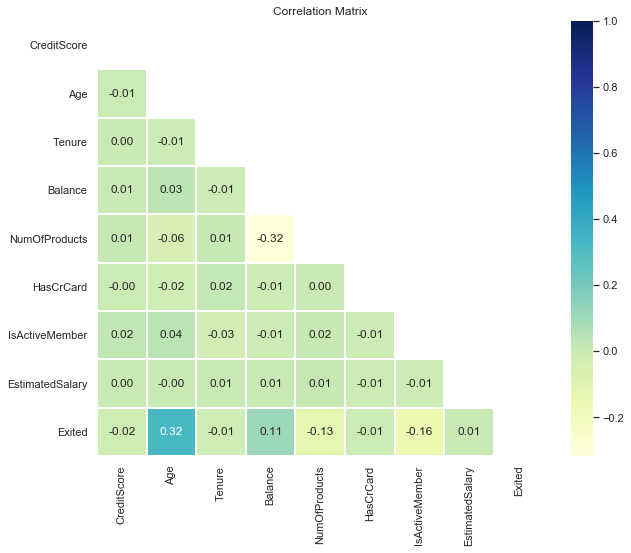

In [53]:
plt.figure(figsize = (10, 8))
corr = data.corr(method='spearman')
mask = np.triu(np.ones_like(corr, dtype=bool))
cormat = sns.heatmap(corr, mask=mask, annot=True, cmap='YlGnBu', linewidths=1, fmt=".2f")
cormat.set_title('Correlation Matrix')
plt.show()

### Feature Engineering -

In [54]:
data['Age Group'] = pd.cut(x=data['Age'], 
                            bins=[18, 40, 60, 95], 
                            labels=['Youngster', 'Middle-Aged', 'Senior Citizen'])

In [55]:
data['Exited'].groupby(data['Age Group']).sum()

Age Group
Youngster          684
Middle-Aged       1236
Senior Citizen     115
Name: Exited, dtype: int64

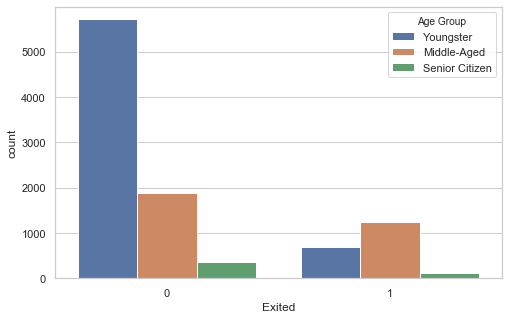

In [56]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Exited', hue='Age Group', data=data)
plt.show()

One-hot encoding the categorical features -

In [57]:
feat_set2 = ['Geography', 'Gender']
data_encoded = pd.get_dummies(data[feat_set2], drop_first=True)
data_encoded.sample(5)

,Geography_Germany,Geography_Spain,Gender_Male
5256,0,1,0
4720,1,0,0
7389,0,1,0
2400,1,0,1
3409,1,0,0


In [58]:
data = data.join(data_encoded)
data.sample(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age Group,Geography_Germany,Geography_Spain,Gender_Male
2651,850,Germany,Male,40,4,166082.15,2,0,1,44406.17,0,Youngster,1,0,1
6125,501,Germany,Female,34,7,93244.42,1,0,1,199805.63,0,Youngster,1,0,0
3612,635,Spain,Female,37,3,0.00,2,1,0,91086.73,0,Youngster,0,1,0
2749,599,France,Male,25,6,120383.41,1,1,1,24903.09,0,Youngster,0,0,1
8425,755,France,Male,29,9,117035.89,1,1,1,21862.19,0,Youngster,0,0,1


In [59]:
final_data = data.drop(['Geography', 'Gender', 'Age Group'], axis=1)
final_data.sample(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
2650,587,33,5,100116.82,1,1,0,34215.58,0,0,0,1
2466,516,32,3,145166.09,2,0,0,111421.45,0,1,0,1
50,698,44,10,116363.37,2,1,0,198059.16,0,1,0,1
4335,708,64,5,0.00,3,0,1,112520.07,1,0,1,0
5508,656,75,3,0.00,2,1,1,1276.87,0,0,0,0


Columns present in the processed data -

In [60]:
final_data.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')

### Splitting the data into independent & dependent variables -

In [61]:
X = final_data.drop('Exited', axis=1)
y = final_data['Exited']

### Splitting the data into train & test sets -

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

### Scaling the data -

In [63]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Importing performance metrics for binary classification -

In [64]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, precision_score, recall_score, roc_auc_score, roc_curve, auc

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.pipeline import Pipeline
pipeline_lr = Pipeline([('lr', LogisticRegression())])
pipeline_svc = Pipeline([('svc', SVC())])
pipeline_dt = Pipeline([('dt', DecisionTreeClassifier())])
pipeline_knn = Pipeline([('knn', KNeighborsClassifier())])
pipeline_nb = Pipeline([('nb', GaussianNB())])

pipelines = [pipeline_lr, pipeline_svc, pipeline_dt, pipeline_knn, pipeline_nb]

pipe_dict = {0: 'Logistic Regression', 
             1: 'Support Vector Classifier', 
             2: 'Decision Tree Classifier',
             3: 'K-Neighbors Classifier', 
             4: 'Naive Bayes Classifier'}

for pipe in pipelines:
    pipe.fit(X_train, y_train)
    
for i, model in enumerate(pipelines):
    print("{}: {:.2f}".format(pipe_dict[i], model.score(X_test, y_test)))

Logistic Regression: 0.81
Support Vector Classifier: 0.86
Decision Tree Classifier: 0.81
K-Neighbors Classifier: 0.83
Naive Bayes Classifier: 0.83


## Support Vector Classifier

Let's train our model -

In [66]:
from sklearn.svm import SVC
svc = SVC(probability=True)
svc.fit(X_train, y_train)

SVC(probability=True)

Predicting the outcome labels for test set -

In [67]:
y_pred_svc = svc.predict(X_test)
y_pred_proba_svc = svc.predict_proba(X_test)[:, 1]

### Performance Evaluation

In [68]:
print("Train accuracy :{:.2f}".format(accuracy_score(y_train, svc.predict(X_train))))
print("Test accuracy :{:.2f}".format(accuracy_score(y_test, svc.predict(X_test))))

Train accuracy :0.87
Test accuracy :0.86


Plotting the Confusion Matrix -

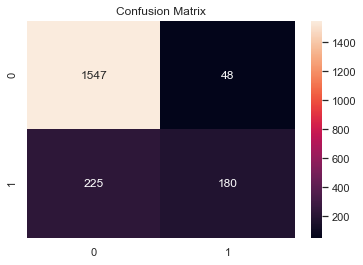

In [69]:
conmat = confusion_matrix(y_test, y_pred_svc)
sns.heatmap(conmat, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

Checking the Classification Report -

In [70]:
print("Classification Report")
print(classification_report(y_test, y_pred_svc))

Classification Report
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1595
           1       0.79      0.44      0.57       405

    accuracy                           0.86      2000
   macro avg       0.83      0.71      0.74      2000
weighted avg       0.86      0.86      0.85      2000



In [71]:
print("F1 Score: {:.2f}".format(f1_score(y_test, y_pred_svc)))
print("Precision: {:.2f}".format(precision_score(y_test, y_pred_svc)))
print("Recall: {:.2f}".format(recall_score(y_test, y_pred_svc)))

F1 Score: 0.57
Precision: 0.79
Recall: 0.44


Calculating area under the ROC curve -

In [72]:
print("AUC Score: {:.2f}".format(roc_auc_score(y_test, y_pred_proba_svc)))

AUC Score: 0.85


Checking the cross validation accuracy of the model -

In [73]:
from sklearn.model_selection import KFold, cross_val_score
kfold = KFold(n_splits=5)
svc_acc = np.mean(cross_val_score(svc, X, y, cv=kfold, scoring='accuracy')) 
print("Cross Validation Score: {:.2f}".format(svc_acc))

Cross Validation Score: 0.80


Plotting the ROC Curve -

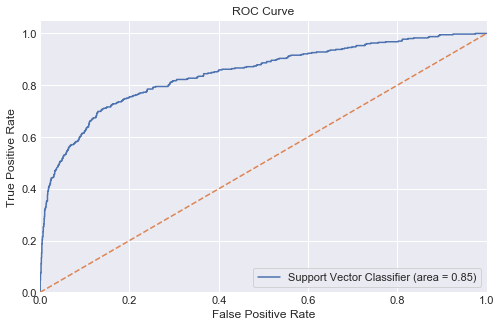

In [74]:
fpr_svc, tpr_svc, threshold_svc = roc_curve(y_test, y_pred_proba_svc)
auc_svc = auc(fpr_svc, tpr_svc)

plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(8, 5))
plt.plot(fpr_svc, tpr_svc, label="Support Vector Classifier (area = {:.2f})".format(auc_svc))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.legend(loc='lower right', frameon=True)
plt.title("ROC Curve")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.show()